In [1]:
if 'google.colab' in str(get_ipython()):
    import sys
    from google.colab import drive, output
    drive.mount('/content/drive')
    !pip install torchaudio
    !pip install wandb --upgrade
    # !wandb login
    # !pip install umap-learn
    output.clear()
    print("Running on colab")
    %load_ext autoreload
    %autoreload 1
    %cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Dataloader')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Models')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Modules')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/temporal')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Extra_and_Unused')
    root = "/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project"
else:
    print("Running local")
    root = "/home/mirp_ai/Documents/Daniel_Nieto/PhD/AutoEncoders_Ecoacoustics"
    root_path = "media/mirp_ai/Seagate Desktop Drive/Jaguas_2018"

Running local


In [2]:
# from __future__ import print_function
# from __future__ import print_function
import os
import numpy as np

import datetime
import gc

from scipy import signal

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torchaudio.transforms as audio_transform

from Jaguas_DataLoader_rainless import SoundscapeData
from Models import ConvAE as AE
# from AE_training_functions import TestModel, TrainModel # For AE
# from PosAE_training_functions import posautoencoding_m1 as AE, TestModel, TrainModel # For PosAE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = xm.xla_device()
print(device)

from datetime import timedelta
import joypy
from sklearn.preprocessing import StandardScaler
import pandas as pd
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# wandb.login()

cuda


In [3]:
# Batch methods
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
import matplotlib.cm as cm

# Single methods
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
from sklearn.metrics import silhouette_samples

In [4]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return sorted([ filename for filename in filenames if filename.endswith( suffix ) ])

In [5]:
AI_path = f"{root}/Jaguas/Complementary_Files/Acoustic_Indices"
files = find_csv_filenames(AI_path, suffix=".csv")

In [ ]:
AI = pd.read_csv(f"{AI_path}/{files[0]}", index_col=0)

In [13]:
AI.iloc[i,0].split("/")[-1]

'G03_20180511_120000.wav'

In [23]:
df_file = pd.read_csv(f"{AI_path}/{files[-4]}")
print(df_file.head())

                  Date                                               file  \
0  2018-06-18 14:40:00  /media/andrescastro/Seagate Backup Plus Drive/...   
1  2018-06-18 14:56:00  /media/andrescastro/Seagate Backup Plus Drive/...   
2  2018-06-18 15:12:00  /media/andrescastro/Seagate Backup Plus Drive/...   
3  2018-06-18 15:28:00  /media/andrescastro/Seagate Backup Plus Drive/...   
4  2018-06-18 15:44:00  /media/andrescastro/Seagate Backup Plus Drive/...   

            ZCR         MEANt      VARt     SKEWt     KURTt       LEQt  \
0  13637.186933 -1.543039e-18  0.003340 -0.001752  3.600042  68.251831   
1  13751.463965 -1.926407e-18  0.002723 -0.000032  3.157405  67.388265   
2  13585.915616 -2.872910e-18  0.002774  0.000426  3.370820  67.446679   
3  13519.259570  1.868499e-18  0.002662 -0.000951  3.658161  67.310516   
4  13305.640194  5.345835e-18  0.002922  0.002697  3.629417  67.685621   

        BGNt      SNRt  ...      TFSD  H_Havrda   H_Renyi  H_pairedShannon  \
0 -14.799092  

In [39]:
AI = pd.read_csv(f"{AI_path}/{files[1]}", index_col=0)
total = len(AI)
for file in files[2::]:
    df_file = pd.read_csv(f"{AI_path}/{file}")
    total += len(df_file)
    print(file)
    AI = AI.append(df_file)
for i in range(len(AI)):
    AI.iloc[i,0] = AI.iloc[i,0].split("/")[-1]
AI.reset_index()

G04_m_AIs.csv
G06_m_AIs.csv
G07_m_AIs.csv
G08_m_AIs.csv
G09_m_AIs.csv
G13_m_AIs.csv
G15_m_AIs.csv
G17_m_AIs.csv
G19_m_AIs.csv
G23_m_AIs.csv
G24_m_AIs.csv
G25_m_AIs.csv
G27_m_AIs.csv
G28_m_AIs.csv
G29_m_AIs.csv
G34_m_AIs.csv
G35_m_AIs.csv
G36_m_AIs.csv


/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipyke

G37_m_AIs.csv
G40_m_AIs.csv
G41_m_AIs.csv
G46_m_AIs.csv
G47_m_AIs.csv
G49_m_AIs.csv
G50_m_AIs.csv
G51_m_AIs.csv
G52_m_AIs.csv
G54_m_AIs.csv
G57_m_AIs.csv
G58_m_AIs.csv


/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipykernel_337480/1458141346.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AI = AI.append(df_file)
/tmp/ipyke

,index,file,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,...,H_Havrda,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,Date
0,2018-05-11 12:00:00,G03_20180511_120000.wav,14149.916772,2.415017e-18,0.003932,0.000218,3.143257,68.965543,-14.563263,0.277839,...,0.333230,4.038240,5.463072,7896.696968,0.984768,0.153029,1.291524,69,2.546246,NaN
1,2018-05-11 12:16:00,G03_20180511_121600.wav,14158.184189,-3.737670e-18,0.002816,0.000059,3.202603,67.516026,-16.088117,0.345504,...,0.333235,4.062408,5.478348,8358.220148,0.985106,0.158340,1.394362,98,6.792497,NaN
2,2018-05-11 12:32:00,G03_20180511_123200.wav,14721.001905,2.355598e-18,0.003981,-0.000236,3.334117,69.014069,-14.466093,0.301878,...,0.333269,4.272563,5.577419,8384.774943,0.987565,0.185297,1.349051,68,3.303942,NaN
3,2018-05-11 12:48:00,G03_20180511_124800.wav,13683.891169,-1.321982e-18,0.002126,-0.000083,3.202884,66.298727,-17.490001,0.284619,...,0.333128,3.694934,5.074656,5583.274672,0.977880,0.101962,1.302595,211,8.592729,NaN
4,2018-05-11 13:04:00,G03_20180511_130400.wav,13806.885659,-6.965750e-19,0.003700,-0.000202,3.200634,68.707945,-15.284672,0.510882,...,0.333169,3.808473,5.235762,6380.847272,0.980550,0.123219,1.352463,212,12.750247,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20052,730,G58_20180704_083200.wav,11960.351506,3.023975e-18,0.000537,0.005511,4.789197,60.321102,-24.680503,1.564295,...,0.333054,3.541570,5.510115,12597.049471,0.980601,0.488480,1.394827,570,7.825354,2018-07-04 08:32:00
20053,731,G58_20180704_084800.wav,14642.078080,-1.160175e-18,0.000886,-0.005307,5.075574,62.492008,-22.068357,1.016301,...,0.332920,3.346190,5.427820,13085.914811,0.975726,0.560592,1.350967,655,7.172801,2018-07-04 08:48:00
20054,732,G58_20180704_090400.wav,9446.390149,1.180149e-18,0.001695,-0.002978,5.466480,65.347843,-20.810522,1.568407,...,0.331811,2.694302,4.608672,7243.345015,0.946466,0.248986,1.313332,410,8.905093,2018-07-04 09:04:00
20055,733,G58_20180704_092000.wav,13087.203715,1.364280e-18,0.002971,0.006165,5.516647,67.801713,-18.016937,1.352755,...,0.330904,2.460765,4.679353,7490.290859,0.940218,0.425903,1.298012,416,4.092640,2018-07-04 09:20:00


In [54]:
base_path = f"{root}/Jaguas/Complementary_Files/Audios_Jaguas/Audios_Jaguas.csv"
base = pd.read_csv(base_path, index_col=0)

In [85]:
corrupted = []
for i in range(len(base)):
    file = base.iloc[i,4]
    columns = np.arange(2,62)
    try:
        base[AI.columns[columns]] = AI[AI["file"] == file].iloc[0,columns]
    except:
        corrupted.append(i)
        print(file)
base = base.drop(corrupted)
# base.to_csv(f"{root}/Jaguas/Complementary_Files/Acoustic_Indices/AI_Jaguas.csv")

20057
20057


In [56]:
base2 = base.drop(columns=["Time", "Recording", "Habitat",
                           "Recorder", "Date", "Municipio",
                           "Vereda", "Latitud", "Rain_occurrence",
                           "Rain_Intesity", "Intensity_Category",
                           "Longitud", "Elevacion"])

In [57]:
len(base2)

20057

In [58]:
AI_array = base2.drop(columns="Filename").to_numpy()

In [59]:
AI_array.shape

(20057, 59)

In [ ]:
list(base["Time"])

In [60]:
y_recorder = list(base["Recorder"])
y_hour = list(base["Time"])
for i in range(len(y_hour)):
    y_hour[i] = int(y_hour[i].split(":")[0])
    y_recorder[i] = int(y_recorder[i][1:3])
print(len(y_hour), len(y_recorder))
y = {"hour": y_hour, "recorder": y_recorder}

20057 20057


In [61]:
from logging import raiseExceptions
import librosa
def plot_silhouette( X, cluster_labels, n_clusters, silhouette_avg, method, extra="", save=False):
    fig, ax1 = plt.subplots(figsize=(12, 12))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0,
                    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    if save == True:
        plt.savefig(f"temporal/clustering_results/{method}/Silhouette_plot_{n_clusters}.pdf", format="pdf")
        plt.show()
    else:
        print("Ploted!")
        pass

def plot_centroids(cluster_centers, model, method, extra="", save=True):
    plt.figure(figsize=(18, 18))
    testing._model.to("cpu")
    for i, spec in enumerate(cluster_centers):
        encodings = spec.reshape(64,9,9)
        encodings = torch.tensor(encodings).float()
        decodings = testing._model.decoder(encodings).detach().numpy()
        plt.subplot(6, 6, i + 1)
        plt.imshow(librosa.power_to_db(decodings[0, :, :]), origin="lower", cmap="viridis")
        plt.xticks(())
        plt.yticks(())
    n_cluster = len(cluster_centers)
    if save == True:
        plt.savefig(f"temporal/clustering_results/{method}/Centroids_plot_{n_cluster}_{extra}.pdf", format="pdf")
        plt.show()
    else:
        print("Ploted!")
        pass
    

import math

def num_rows_cols(num_elements):
    num_rows = int(math.sqrt(num_elements))
    num_cols = (num_elements + num_rows - 1) // num_rows
    return (num_rows, num_cols)

def get_row_col(pos, cols):
    row = pos // cols
    col = pos % cols
    return row, col

class Clustering_Results:
    def __init__(self, model, y, y_label="hour", hist_library="plt"):
        self._labels_cluster = None
        self._hist_library = hist_library
        self._label = y_label
        self._model = model
        self._n_clusters = len(set(model.labels_))
        self.y = y
        self._y = np.asarray(y[self._label])
        self._n_labels = set(self._y)


    def one_cluster_eval(self, cluster):
        index = np.where(self._model.labels_ == cluster)
        index = list(index[0])
        self._labels_cluster = self._y[index]
        return self._labels_cluster
    
    def tagger(self, samples):
        labels = []
        labels_all_clusters = []
        joy_vars = ["hour", "recorder"]
        for cluster in range(self._n_clusters):
            y_aux = []
            labels_cluster = []
            for i, label in enumerate(joy_vars):
                y_aux.append(self.converter(self.y[label]))
                index = np.where(self._model.labels_ == cluster)
                index = list(index[0])
            labels.append(samples[index])
        return labels

    def joyplot(self):
        labels_all_clusters = []
        size_x = 8
        size_y = 6
        joy_vars = ["hour", "recorder"]
        for cluster in range(self._n_clusters):
            y_aux = []
            labels_cluster = []
            for i, label in enumerate(joy_vars):
                y_aux.append(self.converter(self.y[label]))
                index = np.where(self._model.labels_ == cluster)
                index = list(index[0])
                labels_cluster.append(y_aux[i][index])
            df = pd.DataFrame({'recorder':labels_cluster[0], "hour":labels_cluster[1]})
            joypy.joyplot(df, by="hour", column="recorder", range_style='own', 
                            grid="y", hist=False, linewidth=1, legend=False, figsize=(size_x,size_y),
                            title=f"Cluster {cluster} \nLabels distribution along recorders using recorders as rows",
                            colormap=cm.autumn_r, fade=False)
            joypy.joyplot(df, by="recorder", column="hour", range_style='own', 
                                grid="y", hist=False, linewidth=1, legend=False, figsize=(size_x,size_y),
                                title=f"Cluster {cluster} \nLabels distribution along recorders using hours as rows",
                                colormap=cm.autumn_r)
            labels_all_clusters.append(index)
            plt.show()
#             print(len(labels_cluster))
#             print(labels_cluster[1].shape)
#             print(labels_cluster[0:10])
#             print(index[0:20])
        
        return labels_all_clusters
            

    def histograms(self):
        bins = list(self._n_labels)
        num_rows, num_cols = num_rows_cols(self._n_clusters)
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 14))
        if self._n_clusters <= 3:
                axes = np.expand_dims(axes,0)
                fig.set_figheight(6)
                fig.set_figwidth(12)
                if self._n_clusters == 1:
                    axes = np.expand_dims(axes,0)
                else:
                    pass
        else:
            pass
        for hist in range(self._n_clusters):
            aux = self.one_cluster_eval(hist)
            ax_0, ax_1 = get_row_col(hist, num_cols)
            if self._hist_library == "plt":
                axes[ax_0][ax_1].hist(aux, histtype="bar",
                                      color="paleturquoise", cumulative=False,
                                      edgecolor='black', 
                                      linewidth=1.2, bins=bins, stacked=False)
                axes[ax_0][ax_1].set_title(f"Cluster: {hist}", size=16)
            elif self._hist_library == "sns":
                sns.distplot(aux,bins=np.arange(aux.min(), aux.max()+1),
                             hist_kws=dict(edgecolor="black", linewidth=1), 
                             ax=axes[ax_0, ax_1])
                axes[ax_0][ax_1].set_title(f"Cluster: {hist}", size=16)              
            else:
                raise Exception(f"Library {self._hist_library} unused")
        plt.show()

In [79]:
X = AI_array
scaler = StandardScaler().fit(X)
X_n = X
X_scaled = scaler.transform(X)
# X_PCA = PCA(n_components=180).fit_transform(X_scaled)
X_TSNE = TSNE(n_components=2, learning_rate="auto", init='random', random_state=0).fit_transform(X_scaled)

In [ ]:
n_components = 60
X_PCA_ = PCA(n_components=n_components).fit(X)
X_PCA = X_PCA_.transform(X)
plt.figure(figsize=(10,8))
plt.plot(range(0, n_components), X_PCA_.explained_variance_ratio_.cumsum())
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cummulative Explained Variance ")
plt.axhline(y=0.9, c="r", linestyle="--")

In [71]:
Xr = np.random.rand(2068, 60)
Xr.shape

(2068, 60)

In [83]:
from sklearn.cluster import KMeans
import seaborn as sns
Kmeans = KMeans(n_clusters=10, random_state=0).fit(X_TSNE)
import warnings
warnings.filterwarnings("ignore")
Kmeans_Results = Clustering_Results(Kmeans, y, y_label="recorder", hist_library="plt")

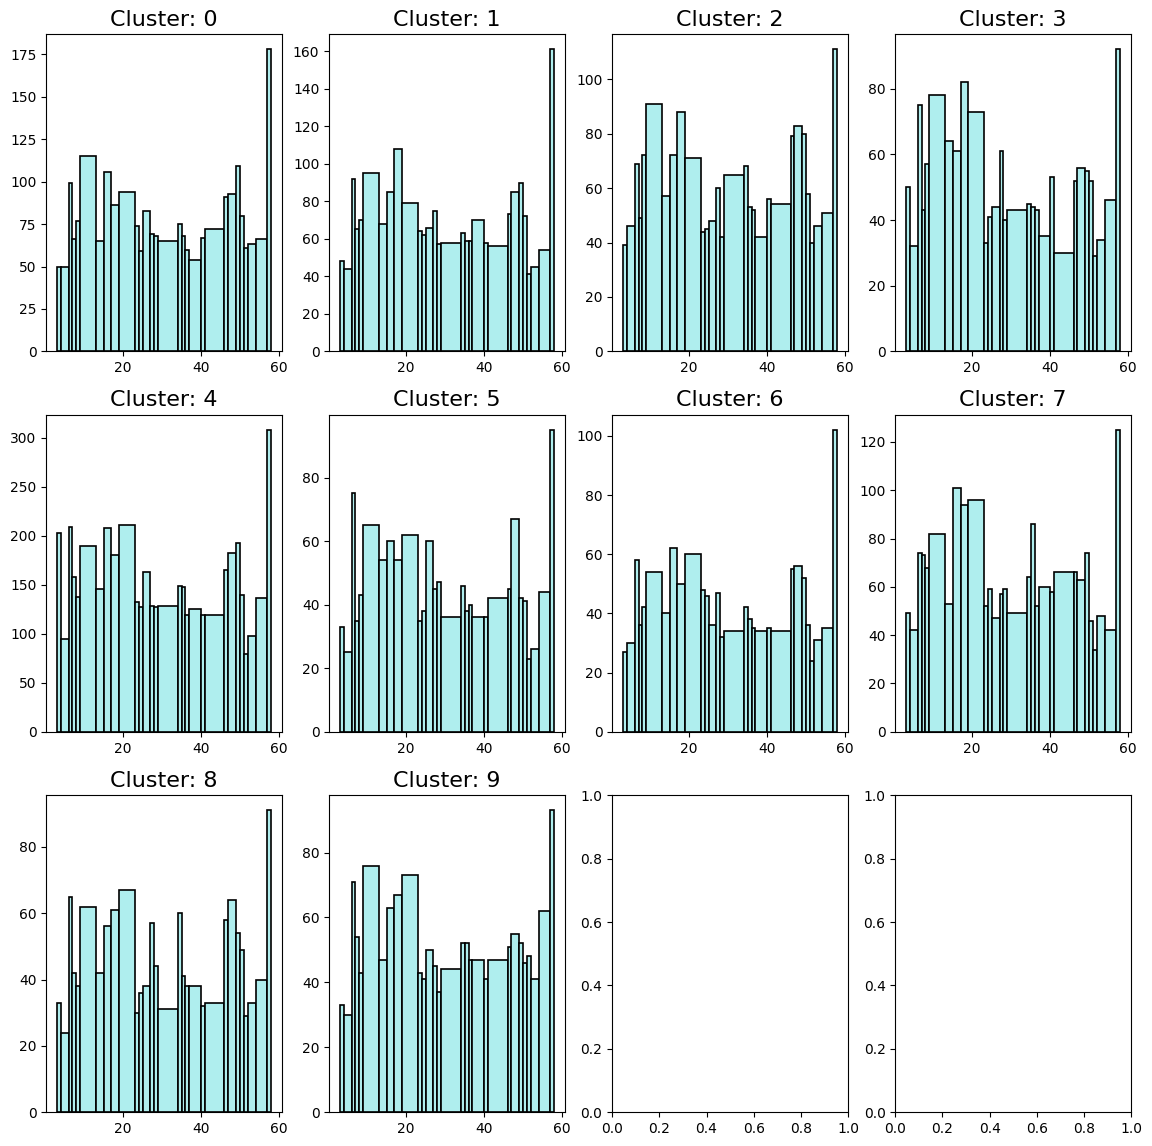

In [84]:
Kmeans_Results.histograms()